**KELOMPOK 2 :**
1. ATHAYA DZAHABIYYAH NAIMI
2. EL SHADDAI JULIETTE HUTAHAEAN
3. MUHAMMAD ZULFAN HAMKA
4. NALA NASIHATUL ULUUM

#**Load and Explore the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
Path = '/content/drive/MyDrive/latihan/latihan/flight price prediction/Clean_Dataset.csv'
dataset = pd.read_csv(Path)

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataset.head(200))

First few rows of the dataset:
     Unnamed: 0    airline   flight source_city departure_time stops  \
0             0   SpiceJet  SG-8709       Delhi        Evening  zero   
1             1   SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2             2    AirAsia   I5-764       Delhi  Early_Morning  zero   
3             3    Vistara   UK-995       Delhi        Morning  zero   
4             4    Vistara   UK-963       Delhi        Morning  zero   
..          ...        ...      ...         ...            ...   ...   
195         195  Air_India   AI-540       Delhi          Night   one   
196         196  Air_India   AI-885       Delhi        Morning   one   
197         197  Air_India   AI-762       Delhi          Night   one   
198         198  Air_India   AI-764       Delhi        Evening   one   
199         199  Air_India   AI-885       Delhi        Morning   one   

      arrival_time destination_city    class  duration  days_left    price  
0            Night         

In [5]:
# Display information about the dataset
print("\nDataset information:")
print(dataset.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129369 entries, 0 to 129368
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        129369 non-null  int64  
 1   airline           129369 non-null  object 
 2   flight            129369 non-null  object 
 3   source_city       129369 non-null  object 
 4   departure_time    129369 non-null  object 
 5   stops             129369 non-null  object 
 6   arrival_time      129369 non-null  object 
 7   destination_city  129369 non-null  object 
 8   class             129368 non-null  object 
 9   duration          129368 non-null  float64
 10  days_left         129368 non-null  float64
 11  price             129368 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 11.8+ MB
None


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(dataset.isnull().sum())


Missing values in the dataset:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               1
duration            1
days_left           1
price               1
dtype: int64


In [7]:
dataset = dataset.dropna()


In [8]:
# Check for missing values
print("\nMissing values in the dataset:")
print(dataset.isnull().sum())


Missing values in the dataset:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


#**Data Preprocessing**

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Verify the column names
print("Columns in the dataset:", dataset.columns)

# Define the categorical features to be encoded with lowercase column names
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Ensure 'price' column exists in the dataset
if 'price' in dataset.columns:
    # Use ColumnTransformer to apply OneHotEncoder to the categorical features
    column_transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ], remainder='passthrough'
    )

    # Apply the transformations to the dataset
    X = dataset.drop('price', axis=1)
    y = dataset['price']
    X = column_transformer.fit_transform(X)

    # Standardize the data
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)

    print("Transformation and scaling successful!")
else:
    print("Error: 'price' column not found in the dataset.")


Columns in the dataset: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')
Transformation and scaling successful!


#**Exploratory Data Analysis (EDA)**

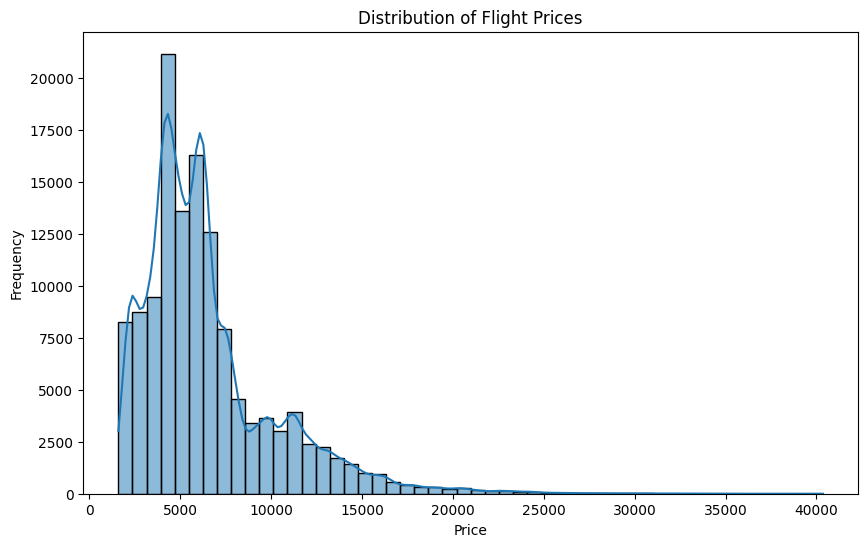

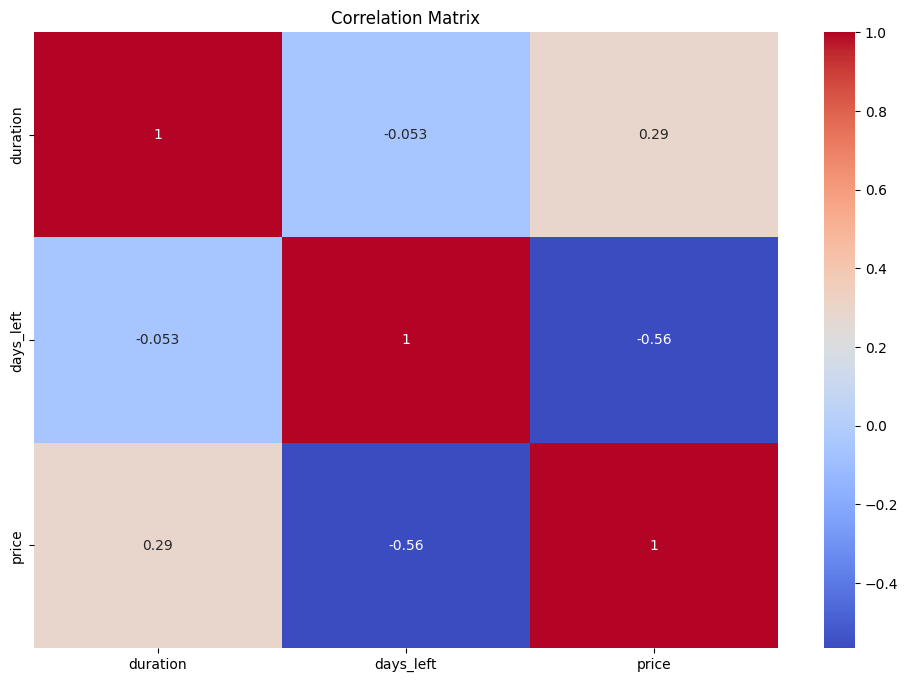

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Select only numerical columns for correlation matrix
numerical_features = ['duration', 'days_left', 'price']

# Create a subset of the dataset with only numerical columns
numerical_data = dataset[numerical_features]

# Visualize correlations between numerical features and price
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#**Model Building, Insights and Interpretation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define categorical features
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Use ColumnTransformer to apply OneHotEncoder to the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough'
)

# Apply the transformations to the dataset
X = dataset.drop('price', axis=1)
y = dataset['price']
X = column_transformer.fit_transform(X)

# Standardize the data
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_linear_pred)
mse = mean_squared_error(y_test, y_linear_pred)
r2 = r2_score(y_test, y_linear_pred)

# ANN Regression
ann_model = MLPRegressor(random_state=42, max_iter=100)
ann_model.fit(X_train, y_train)
y_ann_pred = ann_model.predict(X_test)
ann_mae = mean_absolute_error(y_test, y_ann_pred)
ann_mse = mean_squared_error(y_test, y_ann_pred)
ann_r2 = r2_score(y_test, y_ann_pred)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)


# Visualisasi residuals (selisih antara nilai aktual dan prediksi) untuk model Polynomial Regression
residuals = y_test - y_poly_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals (Polynomial Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Feature Importance untuk model Random Forest
importances = rf_model.feature_importances_
feature_names = column_transformer.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


# Visualisasi perbandingan antara nilai prediksi dan nilai aktual untuk model terbaik (random forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Menampilkan metrik performa model
print("\nModel Performance Metrics:")

# Linear Regression Metrics
print("\nLinear Regression Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Artificial Neural Network Metrics
print("\nArtificial Neural Network Metrics:")
print(f"Mean Absolute Error: {ann_mae}")
print(f"Mean Squared Error: {ann_mse}")
print(f"R-squared: {ann_r2}")

# Polynomial Regression Metrics
print("\nPolynomial Regression Metrics:")
print(f"Mean Absolute Error: {poly_mae}")
print(f"Mean Squared Error: {poly_mse}")
print(f"R-squared: {poly_r2}")

# Random Forest Metrics
print("\nRandom Forest Regression Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

# K-Nearest Neighbors Metrics
print("\nK-Nearest Neighbors Regression Metrics:")
print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")


#**Final Prediction**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define categorical features
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Use ColumnTransformer to apply OneHotEncoder to the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough'
)

# Apply the transformations to the dataset
X = dataset.drop('price', axis=1)
y = dataset['price']
X = column_transformer.fit_transform(X)

# Standardize the data
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# Visualisasi perbandingan antara nilai prediksi dan nilai aktual untuk model terbaik (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()